In [1]:
# Load up diamonds data set
library(ggplot2)

# view rows and columns
dim(diamonds) 

[1] 53940    10

In [2]:
# look at some rows
head(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [3]:
# make factors into bit fields

library(dplyr, warn.conflicts = FALSE)

# NOTE: this time, other cuts removed. We are going to predict: Ideal or Not
diamonds <- mutate(diamonds,
      ideal_cut = ifelse(cut == 'Ideal', 1, 0)
)

head(select(diamonds, -c(1,3:10)))

,cut,ideal_cut
1,Ideal,1
2,Premium,0
3,Good,0
4,Premium,0
5,Good,0
6,Very Good,0


In [4]:
# make more factors into bit fields

diamonds <- mutate(diamonds,
    D = ifelse(color == 'D', 1, 0),
    E = ifelse(color == 'E', 1, 0),
    F = ifelse(color == 'F', 1, 0),
    G = ifelse(color == 'G', 1, 0),
    H = ifelse(color == 'H', 1, 0),
    I = ifelse(color == 'I', 1, 0),
    J = ifelse(color == 'J', 1, 0)
)

diamonds <- mutate(diamonds,
    I1 = ifelse(clarity == 'I1', 1, 0),
    IF = ifelse(clarity == 'IF', 1, 0),
    SI1 = ifelse(clarity == 'SI1', 1, 0),
    SI2 = ifelse(clarity == 'SI2', 1, 0),
    VS1 = ifelse(clarity == 'VS1', 1, 0),
    VS2 = ifelse(clarity == 'VS2', 1, 0),
    VVS1 = ifelse(clarity == 'VVS1', 1, 0),
    VVS2 = ifelse(clarity == 'VVS2', 1, 0)
)

dim(diamonds)

[1] 53940    26

In [5]:
# remove the factors

diamonds <- select(diamonds, -color, -cut, -clarity)

head(diamonds)

,carat,depth,table,price,x,y,z,ideal_cut,D,E,ellip.h,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
1,0.23,61.5,55,326,3.95,3.98,2.43,1,0,1,⋯,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61,326,3.89,3.84,2.31,0,0,1,⋯,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65,327,4.05,4.07,2.31,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58,334,4.2,4.23,2.63,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58,335,4.34,4.35,2.75,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
6,0.24,62.8,57,336,3.94,3.96,2.48,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1


     carat             depth               table             price        
 Min.   :-1.2614   Min.   :-13.08748   Min.   :-6.4700   Min.   :-0.9041  
 1st Qu.:-0.8395   1st Qu.: -0.52310   1st Qu.:-0.6521   1st Qu.:-0.7477  
 Median :-0.2066   Median :  0.03532   Median :-0.2046   Median :-0.3840  
 Mean   : 0.0000   Mean   :  0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.5107   3rd Qu.:  0.52393   3rd Qu.: 0.6905   3rd Qu.: 0.3488  
 Max.   : 8.8860   Max.   : 12.04128   Max.   :16.8015   Max.   : 3.7324  

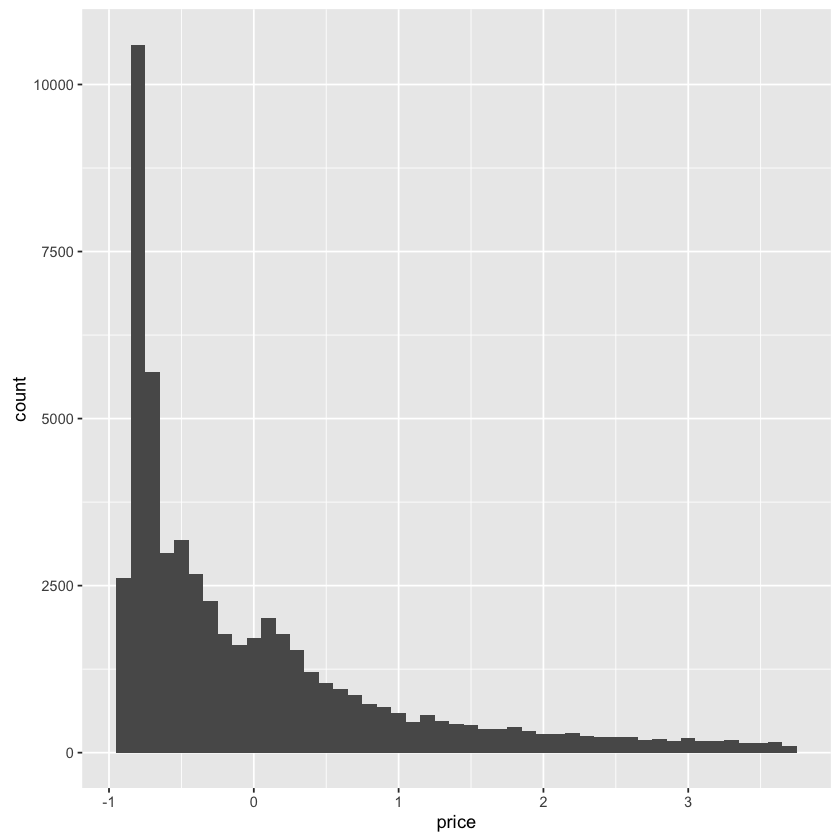

In [6]:
# normalize the numeric numbers (non bit fields) so they are around the same scale
library(graphics)

normalize <- function(x) {
    (x - mean(x)) / sd(x)
}

diamonds <- mutate(diamonds,
                  bias = 1,
                  carat = normalize(carat),
                  depth = normalize(depth),
                  table = normalize(table),
                  x = normalize(x),
                  y = normalize(y),
                  z = normalize(z),
                  price = normalize(price)
            )

summary(select(diamonds, carat, depth, table, price))

qplot(price, data = diamonds, geom = "histogram", binwidth = 0.1) 

In [7]:
# randomize the order

n <- nrow(diamonds)
diamonds <- diamonds[sample(n), ]

head(diamonds)

,carat,depth,table,price,x,y,z,ideal_cut,D,E,ellip.h,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,bias
1,1.924132,1.082348,-1.99472,2.310901,1.612503,1.624567,1.773088,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
2,-0.7762258,1.15215,-0.6521325,-0.7617109,-0.8122563,-0.8182275,-0.6925529,0,0,1,⋯,0,0,0,1,0,0,0,0,0,1
3,1.670974,0.03531645,-0.2046032,2.03392,1.505529,1.537011,1.518022,1,0,0,⋯,0,0,0,0,0,1,0,0,0,1
4,1.059174,0.1051186,-0.2046032,0.3098681,1.140032,1.064213,1.107082,1,0,0,⋯,0,0,0,0,1,0,0,0,0,1
5,-1.050481,-0.243892,-0.6521325,-0.7479245,-1.24907,-1.194715,-1.231026,1,0,1,⋯,0,0,0,0,0,0,0,0,1,1
6,-1.050481,0.8729419,-1.547191,-0.7657215,-1.275813,-1.282271,-1.188515,1,0,0,⋯,0,0,0,0,0,0,0,1,0,1


In [8]:
# use 80% of data to train, 20% to test

split <- floor(n * 0.80)
train <- diamonds[1:split,]
test <- diamonds[-(1:split),]

dim(train)
dim(test)

[1] 43152    24

[1] 10788    24

In [9]:
y = train$ideal_cut
X = data.matrix(select(train, -ideal_cut))
dim(X)

[1] 43152    23

In [10]:
# try regular linear regression

# Warning: COST OR GRADIENT MAY BE INCORRECT HERE
library(functional)

lambda <- 10

sigmoid <- function(z) {
  1 / (1 + exp(-z))
}

cost <- function(theta, X, y, lambda) {
  vals <- X %*% theta
  (1 / nrow(X)) * sum((-1 * y) * log(sigmoid(vals)) - 
                        (1 - y) * log(1 - sigmoid(vals))) +
    ((lambda / nrow(X)) * sum(theta[2:length(theta)] ^ 2))
}

cost_wrapper <- Curry(cost, X = X, lambda = lambda)

grad <- function(theta, X, y, lambda) {
  vals <- X %*% theta
  (1 / nrow(X)) * (t(X) %*% (sigmoid(vals) - y)) + 
    ((lambda / nrow(X)) * sum(theta[2:length(theta)]))
}

grad_wrapper <- Curry(grad, X = X, lambda = lambda)

model <- optim(par = rep(0, length(X[1,])),
               fn = cost_wrapper,
               gr = grad_wrapper,
               y = y,
               control = list(maxit = 1000,
                              alpha = 10))

model$par

[1] -1.48200932 -0.36867243 -2.46760647  0.30856571  1.13745119 -0.02259076
 [7] -0.05068333  0.35407079  0.35398365  0.35413091  0.35404999  0.35378236
[13]  0.35393448  0.35449761  0.35422975  0.35486833 -0.28675930 -0.11860866
[19]  0.35476672  0.35364227  0.35467415  0.35453006 -1.50867059

In [11]:
# predict

X2 <- data.matrix(select(test, -ideal_cut))

test$predict_ideal <- ifelse((sigmoid(X2 %*% model$par) > 0.5), 1, 0)

# show a smaple of predictions
select(test, ideal_cut, predict_ideal) %>%
   sample_n(10)


,ideal_cut,predict_ideal
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0
10,1,1


In [12]:
# calc F1, Precision, Recall, Accuracy

tp <- sum(test$ideal_cut == 1 & test$predict_ideal == 1)
tn <- sum(test$ideal_cut == 0 & test$predict_ideal == 0)
fp <- sum(test$ideal_cut == 0 & test$predict_ideal == 1)
fn <- sum(test$ideal_cut == 1 & test$predict_ideal == 0)

results <- list(
  acc = round((tp + tn) / nrow(test), 3),
  prec = round(tp / (tp + fp), 3),
  rec = round(tp / (fn + tp), 3)
)
results$f1 = round(2 * results$prec * results$rec / (results$prec + results$rec), 3)

print(results)

$acc
[1] 0.781

$prec
[1] 0.743

$rec
[1] 0.694

$f1
[1] 0.718



In [13]:
library(xgboost, warn.conflicts = FALSE)

# train
model = xgboost(data = X, 
                label = y,
                nthread = 4,
                max.depth = 25,
                alpha = 1.5,
                lambda = 1.5,
                nrounds = 200,
                eval_metric = "rmse",
                objective = "reg:logistic",
                verbose = 0)

# predict
test$predict_ideal2 <- round(xgboost::predict(model, data.matrix(test)), 0)


# show a sample
select(test, ideal_cut, predict_ideal2) %>%
   sample_n(10)

,ideal_cut,predict_ideal2
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0
10,0,0


In [14]:
# calc F1, Precision, Recall, Accuracy

tp2 <- sum(test$ideal_cut == 1 & test$predict_ideal2 == 1)
tn2 <- sum(test$ideal_cut == 0 & test$predict_ideal2 == 0)
fp2 <- sum(test$ideal_cut == 0 & test$predict_ideal2 == 1)
fn2 <- sum(test$ideal_cut == 1 & test$predict_ideal2 == 0)

results2 <- list(
  acc = round((tp2 + tn2) / nrow(test), 3),
  prec = round(tp2 / (tp2 + fp2), 3),
  rec = round(tp2 / (fn2 + tp2), 3)
)
results2$f1 = round(2 * results2$prec * results2$rec / (results2$prec + results2$rec), 3)

print(results2)

$acc
[1] 0.857

$prec
[1] 0.801

$rec
[1] 0.856

$f1
[1] 0.828

